# Discrete time stochastic engines 

Now we dedicate ourselves to the study of  stochastic tools used to simulate and analyze financial market behaviors that involve randomness and uncertainty. Such stochastic tools are called *stochastic engines*. We will review different stochatic engines for different time horizons considered in financial modeling. When it comes to the time horizon in financial markets, we refer to *single period* and *multi-period* markets. 

>**Definition 4.1 (Single period market model)** A single period market is the model that considers a single time period $[0,T]$ for taking action and waiting the outcome. We decide the action at time $0$ and wait for the outcome at time $T$. 
 
**Example 4.2** We buy EUR/USD at time $0$ and wait to sell it at time $T$. $\blacksquare$

>**Definition 4.3 (Multi-period market model)** A multi-period market is the model that considers a sequence of time periods $[0,T_1],[T_1,T_2],\ldots,[T_{n-1},T_n]$ for taking actions and waiting the outcome. 
 
In the case of multiperiod markets, common actions consisti in update information, and make adjustments over the investment horizon.  
 
**Example 4.4** Investors adjust their portfolio allocations across several periods based on market conditions, updated forecasts, and changing objectives. $\blacksquare$

The engines we use to model discrete markets are binomial and multinomial Bernoulli processes. We have already seen properties of binomial random variables. The multinomial case can be easily understood as follows: 
 
An experiment may result in $r$ possible outcomes $1,2,\ldots,r$. Let $p_i$ be the probability of the $i$-th outcome, such that $\sum_{i=1}^r p_i = 1$. The experiment is repeated $n$ times independently. Let $N_i$ be the number of times the $i$-th outcome occurs. Since the realization $N_i=n_i$ where $\sum_{i=1}^r n_i = n$ means that we are spliting $n$ objects into $r$ groups of kind $i$, then by independence the probability of this realization is given by

$$
P(N_1=n_1,N_2=n_2,\ldots,N_r=n_r) = \frac{n!}{n_1!n_2!\cdots n_r!} p_1^{n_1} p_2^{n_2} \cdots p_r^{n_r}
$$

When it comes to interpretations, for simplicity a single period Bernoulli process can be thought as a single coin toss, so the sample space is $\Omega_{SP}=\{H,T\}$. The multi period process is then a sequence of independent coin tosses, so the sample space is $\Omega_{MP}=\{H,T\}^n$. To avoid thinking in a simplisti] way about complex market dynamics, we will think of single period and multi-period as one dimensional and multi-dimensional random walks. Those are in the category of *stochastic processes*.

>**Definition 4.5 (Stochastic process)** A stochastic process is a collection $\{X_t\}_{t\in T}$ of random variables indexed by a set $T$. When $T$ is a discrete set, the stochastic process is called a *discrete time stochastic process*. When $T$ is a continuous set, the stochastic process is called a *continuous time stochastic process*. For every fixed $\omega\in\Omega$, the function $\mathbb{T}(\omega, t)$ defined as $t\mapsto X_t(\omega)$ is called a *sample path* of the stochastic process. 
 
>**Definition 4.6 (Simple Random Walk)** A simple random walk is a discrete time stochastic process $S_n$ defined as
>$$
>S_n = S_0 + \sum_{i=1}^n X_i
>$$
>where $S_0$ is the initial state of the process, $X_i$ are i.i.d. random variables, and $S_n$ is the state of the process at time $n$.

The fact that we can obtain more advanced stochastic processes (as we will see in the next sections) from multi-period Bernoulli processes makes it one of the most important and versatile tools in financial modeling. Next we explore the most important properties.

## Time series and martingales

>**Definition 4.7 (Time series)** A time series is a realization of a specific stochastic process.

Since for each $\omega$, we have a trajectory $\mathbb{T}(\omega, t)$, if we define the equivalence relation $\omega\sim\omega' \iff \mathbb{T}(\omega, t)\equiv \mathbb{T}(\omega',t)$ for all $t$, then defining $\Omega_\mathbb{T}=\Omega/\sim$ as the set of equivalence classes, we can identify elementary outcomes $\omega$ with trajectories $\mathbb{T}(\omega, t)$. 

To describe the flow of information associated with a time series, we introduce the concept of filtration. 
 
 >**Definition 4.8 (Filtration)** A filtration is a sequence of $\sigma$-algebras $\mathcal{F}_t$ such that $\mathcal{F}_s \subseteq \mathcal{F}_t$ for all $s \leq t$.

 To build a filtration, for each $t$, we define an equivalence relation $\mathcal{R}_t$ as follows: 
 $$
 \mathbb{T}(\omega, t)\ \mathcal{R}_t\ \mathbb{T}(\omega',t) \iff \forall s\le t,\ \mathbb{T}(\omega, s)=\mathbb{T}(\omega',s)
 $$
 In words, two trajectories are equivalent at time $t$ if they are equal up to time $t$. We know that equivalence classes $\mathcal{T}_t:=\Omega_\mathbb{T}/\mathcal{R}_t$ form a partition of $\Omega_\mathbb{T}$. Since the partition is countable when $\Omega_\mathbb{T}$ is countable, we denote the i-th element of $\mathcal{T}_t$ as $T_{t,i}$. Finally, the sigma-algebra $\mathcal{F}_t$ is defined as the sigma-algebra generated by the equivalence classes $\mathcal{T}_t$. To illustrate this, let's consider the following example of multi-period model.
  
**Example 4.9** Let $S_t$ be the price of a stock at time $t$. We have a time horizon of $T=3$ steps, knowing that the price at $t=0$ is $S_0$. The price movement follows a random walk, i.e $S_t = S_{t-1} + X_t$, where $X_t$ is a random variable such that $X_t\in\{-1,1\}$. So we want an instance of the filtration $\mathcal{F}_t$ for $t=0,1,2,3$.  
 
**Solution:** 
We have in total $2^3=8$ possible trajectories, so $\Omega_\mathbb{T}=\{UUU, UUD, UDU, UDD, DUU, DUD, DDU, DDD\}$, where $U$ and $D$ represent an up and down movement, respectively. At $t=0$, there is no coincidence between trajectories, so 
$$
\mathcal{F}_0=\sigma(\varnothing)=\{\varnothing,\Omega_\mathbb{T}\}
$$
 
 At $t=1$, we have that $|\mathcal{T}_1|=2$, whose elements are $A_U$, all trajectories starting with $U$, and $A_D$, all trajectories starting with $D$, so 
 $$
 \mathcal{F}_1=\sigma(A_U,A_D)=\{\varnothing,A_U,A_D,\Omega_\mathbb{T}\}
 $$
 
 At $t=2$, we have that $|\mathcal{T}_2|=4$, whose elements are $A_{UU}$, all trajectories starting with $UU$, $A_{UD}$, all trajectories starting with $UD$, $A_{DU}$, all trajectories starting with $DU$, and $A_{DD}$, all trajectories starting with $DD$, so 
 $$
 \mathcal{F}_2=\sigma(A_{UU},A_{UD},A_{DU},A_{DD})
 $$

 At $t=3$, we have that $|\mathcal{T}_3|=8$, whose elements are the eight possible trajectories, so 
 $$
 \mathcal{F}_3=\sigma(\Omega_\mathbb{T})=2^{\Omega_\mathbb{T}}
 $$
 
 It is trivial that $\mathcal{F}_0\subseteq\mathcal{F}_1\subseteq\mathcal{F}_2\subseteq\mathcal{F}_3$. 
 
$\blacksquare$


The concept of filtration allows us to define useful random variables like the stopping time.

>**Definition 4.10 (Stopping time)** A stopping time with respect to a filtration $\mathcal{F}_t$ is a random variable $\tau$ taking values in $\mathcal{D}=\{0,1,2...\}\cup\{\infty\}$ such that for all $t\in\mathcal{D}$, we have
>$$
> \{\tau = t\} \in \mathcal{F}_t
>$$

According to the definition, we can decide whether a stopping time has occurred at time $t$ for a trajectory $\mathbb{T}(\omega, t)$ by checking its behavior up to time $t$. In the next example, we also refer to the elements of $\Omega_\mathbb{T}$ as $\omega$.

**Exammple 4.11** In the setup of Example 4.9, in $\Omega_\mathbb{T}$, we define a stopping time $\tau$ as 
$$
\tau(\omega) = \min\{t: S_t(\omega)\ge\lambda\}
$$
We have that $\tau$ is a stopping time with respect to the filtration $\mathcal{F}_t$ for $t=0,1,2,3$. Note that if $\lambda>3$, then $\tau(\omega)=\infty$ since there is no trajectory that reaches the level $\lambda$. 

$\blacksquare$


The concept of filtration allows us to instroduce an important kind of time series, where we can assess the expected behaviour of the trajectory at time $t+1$ given the information up to time $t$ contained in $\mathcal{F}_t$. Since the conditional expectation respect to a sigma-algebra requires the r.v to be integrable, we need $\mathbb{E}[\mathbb{T}(\omega,t+1)]<\infty$ for all $\omega\in\Omega_\mathbb{T}$. Also, for each $t$, all the information of the random variabl $\mathbb{T}(\omega,t)$ is contained in $\mathcal{F}_t$. If in addition the conditional expectation satisfies $\mathbb{E}[\mathbb{T}(\omega,t+1)|\mathcal{F}_t]=\mathbb{T}(\omega,t)$, then we have that $\mathbb{T}(\omega,t)$ is a martingale with respect to the filtration $\mathcal{F}_t$. 
 
>**Definition 4.12 (Martingale)** A stochastic process with discrete time $t$ is a martingale with respect to a filtration $\mathcal{F}_t$ if for all $t$, we have: 
> 
>i. $\mathbb{E}[|X_t|]<\infty$ for all $t$, 
> 
>ii. $X_{t}\in\mathcal{F}_t$ for all $t$.
>
>iii. $\mathbb{E}[X_{t+1}|\mathcal{F}_t]=X_t$ for all $t$.
>
> If in iii. we have $\ge$ instead of $=$ , then we have a submartingale, and if we have $\le$, then we have a supermartingale.

Later we will see that the processes which are martingales play an outstanding role in financial mathematics. The classic interpretation of a martingale is given in the context of gambling. If $X_t$ is the fortune of a gambler at time $t$, and $\mathcal{F}_t$ is the information available to the gambler at time $t$. Then $\mathcal{F}_t$ contains all the information about $X_r$, $r\le t$. The martingale property means that the gambler cannot gain an advantage by changing his strategy during the game. The submartingale property refers to the situation where the gambler is playing a favorable game for him, and the supermartingale property refers to the situation where the gambling is playing an unfavorable game.


**Example 4.13** Let $\{X_k\}$ be a sequence of i.i.d. random variables with $\mathbb{E}[X_n]<\infty$. We define the random variable $S_n=S_0+\sum_{i=1}^n X_i$. We want to know if $S_n$ is a martingale with respect to the filtration $\mathcal{F}_n=\sigma(X_1,X_2,...,X_n)$ for $n=0,1,2,...$.

**Solution:**
We have that $S_n\in\mathcal{F}_n$ for all $n$, so the first condition is satisfied. The second condition is also satisfied since $\mathbb{E}[X_n]<\infty$. Finally, we have that 
$$
\mathbb{E}[S_{n+1}|\mathcal{F}_n]=\mathbb{E}[S_n+X_{n+1}|\mathcal{F}_n]=S_n+\mathbb{E}[X_{n+1}]=S_n+\mathbb{E}[X_{n+1}]
$$
since $\mathbb{E}[X_{n+1}|\mathcal{F}_n]=\mathbb{E}[X_{n+1}]$ by the independence. Then $S_n$ is a martingale if $\mathbb{E}[X_{n+1}]=0$, a submartingale if $\mathbb{E}[X_{n+1}]>0$, and a supermartingale if $\mathbb{E}[X_{n+1}]<0$.

$\blacksquare$

**Example 4.14(Doob's martinagle)** Let $Z$ be an integrable r.v, and $\{\mathcal{F}_n\}$ be a filtration. We define the random variable $X_n=\mathbb{E}[Z|\mathcal{F}_n]$. We want to know if $X_n$ is a martingale with respect to the filtration $\mathcal{F}_n$ for $n=0,1,2,...$.

**Solution:**
We have that $X_n\in\mathcal{F}_n$ for all $n$ by definition of the conditional expectation. The second condition is also satisfied since $\mathbb{E}[Z]<\infty$. Finally, we have (using the property 7 of Proposition 3.34) that
$$
\mathbb{E}[X_{n+1}|\mathcal{F}_n]=\mathbb{E}[\mathbb{E}[Z|\mathcal{F}_{n+1}]|\mathcal{F}_n]=\mathbb{E}[Z|\mathcal{F}_n]=X_n
$$

$\blacksquare$

The definition of a martingale leads to the fact that in a fair game, the expected fortune of the gambler is constant, and in a favorable game, the expected fortune of the gambler is nondecreasing. 
 
 >**Proposition 4.15** Let $X_n$ be a martingale with respect to the filtration $\mathcal{F}_n$ for $n=0,1,2,...$. Then for all $n$, $k\ge 1$, we have
 > 
 >i. If $X_n$ is a submartingale, then $\mathbb{E}[X_{n+k}] \ge \mathbb{E}[X_{n}]$ for all $n$. 
 >
 >ii. If $X_n$ is a martingale, then $\mathbb{E}[X_{n+k}] = \mathbb{E}[X_{n}]$ for all $n$. 
 > 

**Proof:** Left as an exercise. Hint: Take into account that if $A\in\mathcal{F}_n$, then $A\in\mathcal{F}_{n+k}$ for all $k\ge 1$.

$\blacksquare$


When we have a convex function $\phi$ and an integrable r.v $X$, the following lemma is Jensen's inequality for conditional expectation, which is useful to stablish an important reult for mantingales. 
 
>**Lemma 4.16** Let $\phi$ be a convex function, $X$ be an integrable r.v, and $\mathbb{E}[\phi(X)]<\infty$. Then we have
>$$
>\mathbb{E}[\phi(X)|\mathcal{F}]\ge\phi(\mathbb{E}[X|\mathcal{F}])
>$$

**Proof:** Left as an exercise. 
$\blacksquare$
 
>**Proposition 4.17** Let $X_n$ be a martingale with respect to the filtration $\mathcal{F}_n$ for $n=0,1,2,...$. Let $\phi$ be a convex function, and $\mathbb{E}[\phi(X_n)]<\infty$ for all $n$. Then $\phi(X_n)$ is a submartingale.

**Proof:** Left as an exercise. 

$\blacksquare$  
 
**Example 4.18** Let $X_n$ be a martingale with respect to the filtration $\mathcal{F}_n$ for $n=0,1,2,...$. Since $\phi(x)=|x|^p$, $p\ge 1$, is a convex function, we have that $|X_n|^p$ is a submartingale.

$\blacksquare$

Another important kind of time series are those posessing the Markov property, where the future depends only on the present, and not on the past. Those series are called Markov chains. A way to describe a Markov chain is by means of a transition matrix. If we assume that the r.v $X_n$ takes values in a countable set $\mathcal{S}=\mathcal{X}=\{0,1,2,...\}$, called the state space, then the transition matrix $P$ is a $k\times k$ matrix such that $P_{ij}=P(X_{n+1}=j|X_n=i)$ for all $i,j=1,2,...$. 
 
 >**Definition 4.19 (Markov Chain)** A discrete time stochastic process $\{X_n\}$ is a Markov chain if 
 > 
 >$$
 >P(X_{n+1}=j|X_{n}=i,X_{n-1}=i_{n-1},...,X_0=i_0)=P(X_{n+1}=j|X_{n}=i)
 >$$
 >
 >for all $n\ge 1$ and all $i_0,i_1,...,i_{n-1},i\in\mathcal{X}$
 >
 >
 

 The value $p_{ij}=P(X_{n+1}=j|X_{n}=i)$ is the probability of transitioning from state $i$ to state $j$ in one step. Since from the state $i$, the process can only transition to one of the other states, we have that 
 $$
 \sum_{j\in\mathcal{X}}p_{ij}=1
 $$
 for all $i\in\mathcal{X}$. 

We define the $n$ step transition probability as $p_{ij}^{(n)}=P(X_{k+n}=j|X_{k}=i)$ for all $i,j\in\mathcal{X}$ and $n\ge 1$. The transition probability matrix $P^{(n)}$ is a $k\times k$ matrix such that $P_{ij}^{(n)}=P(X_{k+n}=j|X_{k}=i)$ for all $i,j\in\mathcal{X}$ and $n\ge 1$. The way of computing transition probabilities with $n$ steps is through Chapman-Kolmogorov equation: 
 
>**Theorem 4.20 (Chapman-Kolmogorov equation)** Let $\{X_n\}$ be a Markov chain with transition matrix $P$. Then for all $n,m\ge 1$, we have
>$$
>p_{ij}^{(n+m)}=\sum_{k\in\mathcal{X}}p_{ik}^{(n)}p_{kj}^{(m)}
>$$

**Proof:** Left as an exercise. 

$\blacksquare$



 


## Binomial stochastic engines 

We use an variant of the Bernoulli model, where the r.v $X$ takes values in $\{-1,1\}$. The Bernoulli process can represent uncertain returns of an investment, especially in simplified models or specific situations. In our context, we assume  
$$
P(X=1) = p, \quad P(X=-1) = 1-p = q
$$

Considering $1$ as a success, and $-1$ as a failure, then $X\sim Binomial(1,p)$. The CDF of $X$ is given by
$$
F_{X}(x) = \begin{cases}
    0 & \text{if } x<-1 \\
    q & \text{if } -1\le x<1 \\
    1 & \text{if } x\ge 1
\end{cases}
$$

The characteristic function of $X$ is given by
$$
\phi_{X}(t) = \mathbb{E}[e^{itX}] = pe^{it} + qe^{-it}
$$

The the $k$-th moment of $X$ is given by
$$
\mathbb{E}[X^k] = i^{-k}\frac{d^k}{dt^k}\phi_{X}(t)\bigg|_{t=0} = p + q(-1)^k
$$

So expected value and variance are:
$$
\mathbb{E}[X] = p - q, \quad \mathbb{E}[X^2] - (\mathbb{E}[X])^2 = 4pq
$$

The fair case produce 
$$
\mathbb{E}[X] = 0, \quad \mathbb{E}[X^2] = 1
$$

For the multiperiod market, we take $T$ independent r.vs $X_1,X_2,...,X_T$. Then we have three equivalent ways of descirbing the market. First, we consider the usual coint toss model, where $\omega=(\omega_1,\omega_2,...,\omega_T)$, with $\omega_i\in\{0,1\}$. This way we can think the outcome of an integer $\hat{\omega}$ number whose binary representation is
$$
\hat{\omega} = \sum_{t=1}^T \omega_i 2^{t-1}
$$

Since in finance, the preferred interpretation of the coin toss model is in the term of random walk, we turn $\omega$ into a new form $\omega'$ where $\omega'_i = 2\omega_i - 1$. This way, each $\omega'_i$ describes the corresponding movement of the particle up or down. Finally, we use $\omega'$ to define the random walk $S_t$ as
$$
S_t = S_0 + \sum_{i=1}^t \omega'_i
$$

Also, beacuse each trajectory uniquely determines $\hat{\omega}$, $\omega'$ and $S_t$, we use the same symbol $\omega$ to refer to a trajectory in any of the three forms, choosing the one according to the context. The space of all possible trajectories is $\Omega_{\mathbb{T}}$, which has cardinality $2^T$. The $i$-th trajectory is denoted by $\omega_i$, $0\le i\le 2^T-1$. Considering $1$ as a success with probability $p_1$, we are in presence of a binomial model $Binomial(T,p_1)$. That is why we endow $\Omega_{\mathbb{T}}$ with the probability measure $P$ defined by
$$
P(\omega_i) = p_1^{\chi_1(\omega_i)} p_0^{\chi_0(\omega_i)}
$$

where $\chi_1(\omega_i)$ is the number of $1$s in $\omega_i$, $\chi_0(\omega_i)$ is the number of $0$s in $\omega_i$, and $p_0 = 1-p_1$. It is clear that 
$$
\chi_1(\omega_i) + \chi_0(\omega_i) = T, \quad S_T = S_0 + \chi_1(\omega_i) - \chi_0(\omega_i)
$$

When we consider two sequences of Bernoullli trials with different probabilities of success, we can use the transformation of measures to find the probability of a given trajectory. Both sequences will have the same space of trajectories, but different probability measures. Let $P$ and $Q$ be the probability measures of the two sequences. We can define a new probability measure $Q$ as follows given $q_1$ as the probability of success:
$$
Q(\omega_i) = q_1^{\chi_1(\omega_i)} q_0^{\chi_0(\omega_i)}
$$

where $q_0 = 1-q_1$. 

Note that for $P$ and $Q$, every trajectory has positive probability, hence, $P(A)=0$ implies that $A=\emptyset$, which implies that $Q(A)=0$. The Radon-Nikodym derivative can easily be found as the ratio of the two probability measures. So, assuming $S_0=0$ and having into account that $\chi_1=\frac{S_T+T}{2}$ and $\chi_0=\frac{T-S_T}{2}$, we have
$$
\frac{Q(\omega_i)}{P(\omega_i)} = \left(\frac{q_0q_1}{p_0p_1}\right)^{T/2} \left(\frac{p_0q_1}{p_1q_0}\right)^{S_T(\omega_i)/2}
$$
for all $\omega_i\in\Omega_{\mathbb{T}}$.

That way, the transformation of measures is given by
$$
P(\omega_i) \to \left(\frac{q_0q_1}{p_0p_1}\right)^{T/2} \left(\frac{p_0q_1}{p_1q_0}\right)^{S_T(\omega_i)/2} P(\omega_i)
$$

allows us to alter the probability of negative and positive returns, in particular, we can always make its random walk symmetric.

Recall that the probability of the event $A_{n_0,n_1} = \{ \omega: \chi_0(\omega)=n_0, \chi_1(\omega)=n_1 \}$ is given by
$$
P(A_{n_0,n_1}) = \binom{T}{n_0} p_0^{n_0} p_1^{n_1}
$$

To finde the probability of the event $\{S_T=k\}$, we base on the fact that 
$$
S_T = 2\chi_1(\omega) - T = T - 2\chi_0(\omega)
$$

So, $S_T$ belongs to the set $\mathbb{S}_{[-T,T]}=\{-T, -T+2, -T+4, ..., T-4, T-2, T\}$ which has cardinality $T+1$. Also, it is stright forward that 
$$
\{S_T=k\} = A_{\frac{T-k}{2},\frac{T+k}{2}}
$$

for $k\in\mathbb{S}_{[-T,T]}$. So, the probability of the event $\{S_T=k\}$ is given by
$$
P(S_T=k) = P(A_{\frac{T-k}{2},\frac{T+k}{2}}) = \binom{T}{\frac{T-k}{2}} p_0^{\frac{T-k}{2}} p_1^{\frac{T+k}{2}},
$$
and the CDF of $S_T$ is given by
$$
F_{S_T}(x) = \begin{cases}
    0 & \text{if } x<-T \\
    \displaystyle\sum_{k=-T}^{\lfloor x\rfloor} P(S_T=k) & \text{if } -T\le x<T \\
    1 & \text{if } x\ge T
\end{cases}
$$

Nothe that $\chi_1\sim Binomial(T,p_1)$ and $\chi_0\sim Binomial(T,p_0)$. So, the modes of $\chi_1$ and $\chi_0$ are given by
$$
\Lambda_1=\lfloor (T+1)p_1\rfloor, \quad \Lambda_0=\lfloor (T+1)p_0\rfloor
$$

Since $S_T=2\chi_1(\omega)-T = T-2\chi_0(\omega)$, we have that the mode of $S_T$ is given by
$$
\Lambda_{S_T} = 2\Lambda_1 - T = T - 2\Lambda_0
$$

In the case where $(T+1)p_i$ is an integer, we have two modes for $S_T$, namely $\Lambda_{S_T}$ and $\Lambda_{S_T}+2$. For the characteristic function, we use the fact that $S_T$ is the sum of $T$ independent r.vs $X_i\sim Binomial(1,p_1)$, whose characteristic function was already found above. Then, 
$$
\phi_{S_T}(t) = \mathbb{E}[e^{itS_T}] = \left(\phi_{X_i}(t)\right)^T = \left(p_1e^{it} + p_0e^{-it}\right)^T
$$

Using the characteristic function, we can find the moments of $S_T$ as follows:
$$
\mathbb{E}[S_T] = T(p_1-p_0)
$$
$$
\mathbb{V}[S_T] = 4p_1p_0T
$$

Recall that $\lfloor x\rfloor = y$ implies that there existis an $\epsilon\in[0,1)$ such that $y=x-\epsilon$. So, we have that
$$
\Lambda_{S_T} = T(p_1-p_0)+2p_1-2\epsilon
$$

The above identity implies that when $T$ is large such that $2p_1-2\epsilon$ becomes negligible, we have that $\Lambda_{S_T} \approx T(p_1-p_0)$. More precisely, we have that
$$
\Lambda_{S_T} \sim T(p_1-p_0) \quad \text{as } T\to\infty
$$

Hence, considering the standard deviation of $S_T$, we have that the most likely value of $S_T$ is located at an interval of order $\sqrt{T}$ around $T(p_1-p_0)$.


### Applied limit theorems 

For moderate $T$, tje distribution of $S_T$ is relatively simple. But as $T$ becomes large, computations become difficult. Fortunately, we can use limites theorems to asses the asymptotic behavior of $S_T$. 

The SLLN yields 
$$
\lim_{T\to\infty}\frac{S_T}{T} = p_1-p_0\quad \text{a.s.}
$$


Now we refer to a "fluctuation" as the deviation of the partial sum $S_T$ from its mean $T(p_1-p_0)$. The way to measure the size of a fluctuation is using the Law of iterated logarithm (LIL). 
>**Theorem (Law of iterated logarithm)**
>
> If $\{X_n\}$ is a sequence of i.i.d. r.vs with $\mathbb{E}[X_n]=0$ and $\mathbb{V}[X_n]=1$, then if we define $S_n=\sum_{i=1}^n X_i$, then
> 
>$$
>\limsup_{n\to\infty}\frac{S_n}{\sqrt{2n\ln\ln n}} = 1\quad \text{a.s.}
>$$
>
>

In order to apply the LIL, let's define 
$$
Y_i = \frac{X_i-p_1+p_0}{\sqrt{4p_1p_0}},\quad \hat{S_T} = \sum_{i=1}^T Y_i = \frac{S_T-T(p_1-p_0)}{\sqrt{4p_1p_0}}
$$

The $\mathbb{E}[Y_i]=0$ and $\mathbb{V}[Y_i]=1$. Since a Corolary from the LIL is that the same holds for the $\liminf$ tending to $-1$, we get $|\frac{\hat{S_T}}{\sqrt{2T\ln\ln T}}|\le 1$ a.s. , which imples
$$
-\sqrt{8p_1p_0T\ln\ln T}\le S_T - T(p_1-p_0)\le \sqrt{8p_1p_0T\ln\ln T} \quad \text{a.s.}
$$

The following script shows the LIL envelope for the random walk $S_T$ with $p_1=0.5$ and $T=10^5$.





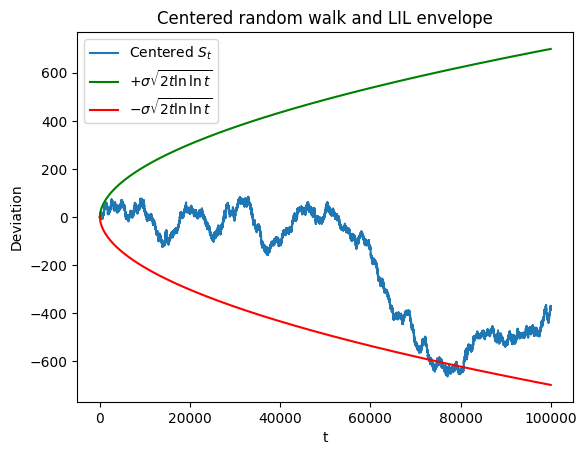

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
T = 100_000          # number of steps
p1 = 0.5             # P(+1)
p0 = 1 - p1
sigma = 2 * np.sqrt(p1 * p0)       # std-dev of centred step

# simulate one walk
steps = np.random.choice([1, -1], size=T, p=[p1, p0])
S     = np.cumsum(steps)
muT   = (p1 - p0) * np.arange(1, T + 1)
centred = S - muT                 # S_t − μt

# LIL envelope
t       = np.arange(1, T + 1)
lil_env = sigma * np.sqrt(2 * t * np.log(np.log(np.maximum(t, 3))))

plt.figure()
plt.plot(t, centred, label="Centered $S_t$")
plt.plot(t,  lil_env,  color='green',   label=r"$+\sigma\sqrt{2t\ln\ln t}$")
plt.plot(t, -lil_env,  color='red',   label=r"$-\sigma\sqrt{2t\ln\ln t}$")
plt.xlabel("t"); plt.ylabel("Deviation")
plt.title("Centered random walk and LIL envelope")
plt.legend()
plt.show()



The CLT applied to $S_T$ allows us to approximate the distribution of $S_T$ in the interval 
$$
I_{T,A,B}=\{k\in\mathbb{Z}:(p_1-p_0)T + A\sqrt{T4p_1p_0}\le k\le (p_1-p_0)T + B\sqrt{T4p_1p_0}\}
$$
with a normal distribution. The approximation is often called the **Moivre-Laplace theorem**, and it is indeed a special case of the CLT.
 
 >**Theorem** (Moivre-Laplace) Let $A,B\in\mathbb{R}$, $A<B$. Then for the random walk $S_T$ we have
 >
 >$$
 >\lim_{T\to\infty}\sum_{k\in I_{T,A,B}} \mathbb{P}\left(S_T = k\right) = \int_A^B \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx = \Phi(B) - \Phi(A)
 >$$
 >
 >In particular,
 >$$
 >\lim_{T\to\infty}\sum_{k\in I_{T,A,\infty}} \mathbb{P}\left(S_T = k\right) = \Phi(-A),\quad \lim_{T\to\infty}\sum_{k\in I_{T,-\infty,B}} \mathbb{P}\left(S_T = k\right) = \Phi(B)
 >$$
 >

 Something important to take into account is the rate of convergence of the CLT, and particularly for the Moivre-Laplace theorem. An oustanding result in this direction is the **Berry-Esseen theorem**.
  
>**Theorem** (Berry-Esseen) Let $\{Y_i\}$ be a sequence of i.i.d. random variables such that $\mathbb{E}[Y_i]=0$, $\mathbb{E}[Y_i^2]=\sigma^2$, and $\mathbb{E}[|Y_i|^3]<\infty$. Let $S_n=\sum_{i=1}^n Y_i/(\sigma\sqrt{n})$ and $F_n$ be the distribution function of $S_n$. Then
>
>$$
>\sup_{x\in\mathbb{R}}|F_n(x) - \Phi(x)| \le \frac{C\mathbb{E}[|Y_i|^3]}{\sigma^3\sqrt{n}}
>$$
>
>for some constant $C<\infty$.
>
>

**Proof** See Albert Shyriaev's book "Probability I", Chapter 3, Section 11. $\blacksquare$

The bound for the constant are $0.4097\le C\le 0.469$. In our setup for $S_T$, if we take $Y_i=X_i-p_1+p_0$, then $\mathbb{E}[|Y_i|^3]=p_1p_0(p_1^2+p_0^2)$. Defining 
$$
F_T(x) = P\left(\frac{S_T - (p_1-p_0)T}{\sqrt{4p_1p_0T}} \le x\right)
$$
we have
$$
\sup_{x\in\mathbb{R}}|F_T(x) - \Phi(x)| \le \frac{0.469\cdot(p_1^2+p_0^2)}{8\sqrt{p_1p_0T}}
$$

It can be shown that the order of the stimate is $(1/\sqrt{Tp_1p_0})$ can't be improved. And this means that the approximation can be poor for cases where $p_1$ is very close to 0 or 1., even for large $T$. A rule of thumbs is that Moivre-Laplace is good in practice provided that $p_0,p_1>1/(T+1)$ and $p_0p_1>9/T$. Then, keeping $p_1$ fixed when $T$ becomes large, the random variable 
$$
\eta_T = \frac{S_T - (p_1-p_0)T}{\sqrt{4p_1p_0T}}
$$
converges to a standard normal random variable. 
 
Recall that when $p_1$ is close to 0 or 1, the distribution becomes skewed, and it can be approximated by the Poisson distribution. So, let's restate the Poisson approximation theorem in the current context. 
 
>Theorem (Poisson approximation) Let $p_1^T$ such that 
>$$
>Tp_1^T\to \lambda\in(0,\infty)\quad\text{as}T\to\infty
>$$
>Then, 
>$$
>\lim_{T\to\infty}\mathbb{P}\left(\chi_1(\omega_i)=t_1, \chi_0(\omega_i)=t_0\right) \to \frac{\lambda^{t_1}}{t_1!}e^{-\lambda}
>$$
> where $t_0+t_1=T$ and,
>$$
>P(S_T=k)\to \frac{\lambda^{(T+k)/2}}{(\frac{T+k}{2})!}e^{-\lambda}
>

As we already know, the Poisson distribution is good for modeling phenomena with main inteerest in rare events, so this distribution appears in financial models that take into account discontinuous movements in asset prices, which represent large shocks usually driven by disasters or another sort of rare events. 






### Additional properties of the random walk

In this section, we mention useful properties for random walks. We assume that the particle starts at the origin, $S_0=0$. A path from origin $(0,0)$ to $(T, S_T)$ exists only when there exist $\omega$ such that
$$
S_T = U_T(\omega) - D_T(\omega),\quad U_T(\omega) + D_T(\omega) = T.
$$
where $U_T(\omega)$ is the number of up movements and $D_T(\omega)$ is the number of down movements. From now on, we assume that we are evaluating in an $\omega$ such that the considered paths exists, so we omit the dependence on $\omega$ in the notation. Hence, the number of paths from origin $(0,0)$ to $(T, S_T)$ is given by
 $$
 N_{T,S_T} = \binom{U_T+D_T}{U_T} = \binom{T}{U_T} = \binom{T}{D_T}.
 $$

An useful property based on the reflection principle of trajectories is the following:
 
 >**Theorem (Ballot theorem)** Let $T$ and $S_T$ positive integers, then the number of trajectories from the origin $(0,0)$ to $(T, S_T)$ where $S_k>0$ for all $k\in\{1,2,\ldots,T\}$ is given by
 >$$
 >\frac{S_T}{T}N_{T,S_T} 
 >$$

 **Proof** Left as an exercise. $\blacksquare$
 
 Another important concept is the **return to the origin**, which occurs at time $k$ when $S_k=0$. Note that by necesity, $k$ must be even. Let $\nu$ such that $k=2\nu$. Then, the probability of a return to the origin at time $k$ is given by
 $$
 P(S_{2\nu}=0) = \binom{2\nu}{\nu} p_0^{\nu} p_1^{\nu}
 $$
 
 For the symmetric random walk, if we use the Stirling approximation, we have that
 $$
 P(S_{2\nu}=0) \approx \frac{1}{\sqrt{\pi\nu}}
 $$

 for large $\nu$. The user can check that the approximation is excellent even for moderate values of $\nu$. Next we define the **first return to the origin**, which deserves special attention.
 
 >**Definition (First return to the origin)** The first return to the origin is the first time $k$ such that $S_k=0$. This is,
 >$$
 >S_1\not=0, S_2\not=0, \ldots, S_{2\nu-1}\not=0, S_{2\nu}=0.
 >$$
 
We denote by $f_{2\nu}$ the probability of the first return to the origin at time $2\nu$. The relation between a first return and an ordinary return emerges from the fact that for a return to occur at time $2n$, there must be a first return at time $2n$ or any even time before. Hence, using Total Probability Law,  we have that 
$$
P(S_{2n} = 0) = \sum_{k=1}^{n} P(S_{2n} = 0 | S_2\not = 0, \ldots, S_{2k-2}\not = 0, S_{2k} = 0)f_{2k}
$$

Now, since a movement from $(2k,0)$ to $(2n, 0)$ is the same as a movement from $(0,0)$ to $(2n-2k, 0)$, we have that
$$
P(S_{2n} = 0 | S_2\not = 0, \ldots, S_{2k-2}\not = 0, S_{2k} = 0) = P(S_{2n-2k} = 0)
$$
Hence, we have that
$$
P(S_{2n} = 0) = \sum_{k=1}^{n} P(S_{2n-2k} = 0)f_{2k}
$$

Denoting $u_{2n} = P(S_{2n} = 0)$, we have that
>$$
>u_{2n} = \sum_{k=1}^{n} u_{2n-2k}f_{2k}
>$$






 
 
 